<a href="https://colab.research.google.com/github/JoshuoYang/Machine_Learning-project4/blob/main/310712009_ML_HW4_Final_1122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Random Data Generator


An easy-to-program approximate approach

An easy-to-program approximate approach that relies on the central limit theorem is as follows: **generate 12 uniform U(0,1) deviates, add them all up, and subtract 6 – the resulting random variable will have approximately standard normal distribution**. In truth, the distribution will be Irwin–Hall, which is a 12-section eleventh-order polynomial approximation to the normal distribution. This random deviate will have a limited range of (−6, 6).[54] Note that in a true normal distribution, only 0.00034% of all samples will fall outside ±6σ.

Approximating a Normal distribution

https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution#Approximating_a_Normal_distribution

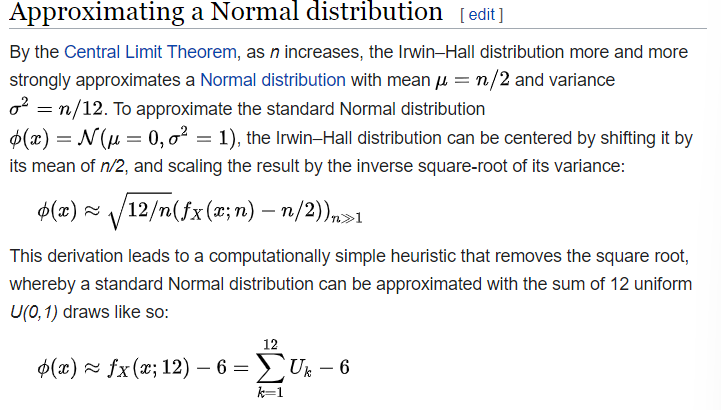

In [ ]:
import numpy as np
from numba import njit

# Using central limit theorem
def Gaussian_data_gen(mean, var):
    uniPoints = np.random.uniform(0.0, 1.0, 12)
    gaussianPoint = (uniPoints.sum() - 6) * (var ** 0.5) + mean
    return gaussianPoint

def Linear_data_gen(basis, a, W):
    point = Gaussian_data_gen(0.0, a)
    x = np.random.uniform(-1.0, 1.0)
    for i in range(len(W)):
        point += W[i] * (x ** i)
    return (x, point)

# HW4-1 Logistic_regression
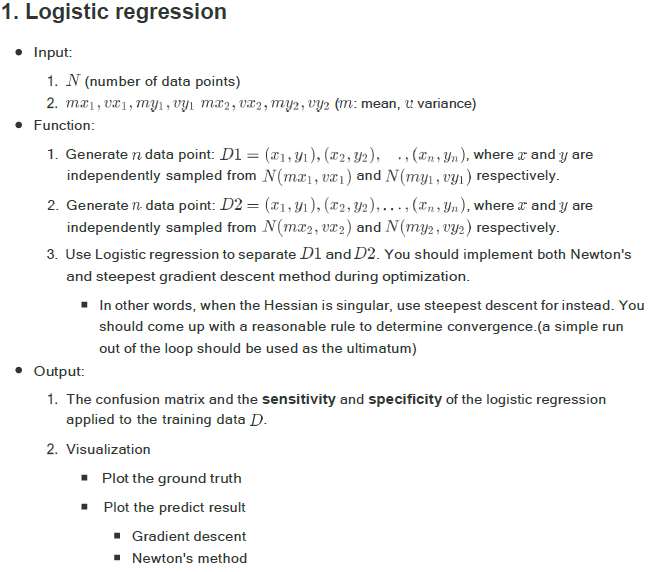

## Gradient_descent

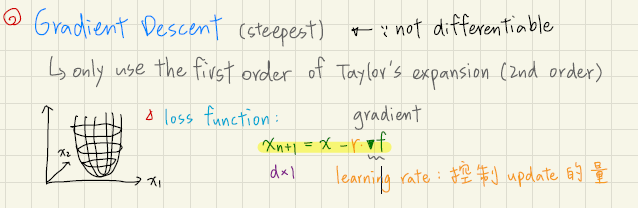

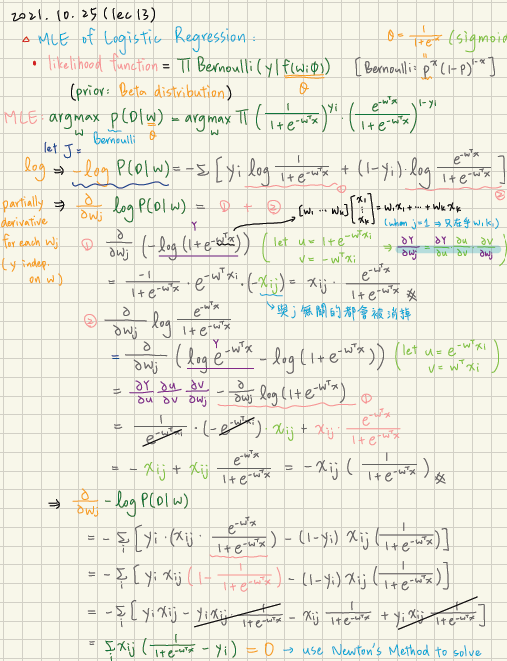

In [ ]:
def Gradient_descent(X, labels, learning_rate):
    W = np.random.rand(3, 1) # 初始權重w
    dW = np.ones((3, 1))

    count = 0
    while (np.linalg.norm(dW) > 1e-2): # 小於1e-2就停止(代表gradient很接近0)
        count+=1
        dW = X.T @ (labels - 1 / (1 + np.exp(-X @ W)))
        W = W + learning_rate * dW # 更新權重
        if count == 10000: #若尚未收斂1e-2，則到10000次就break
            break
    return W

## Newton's Method

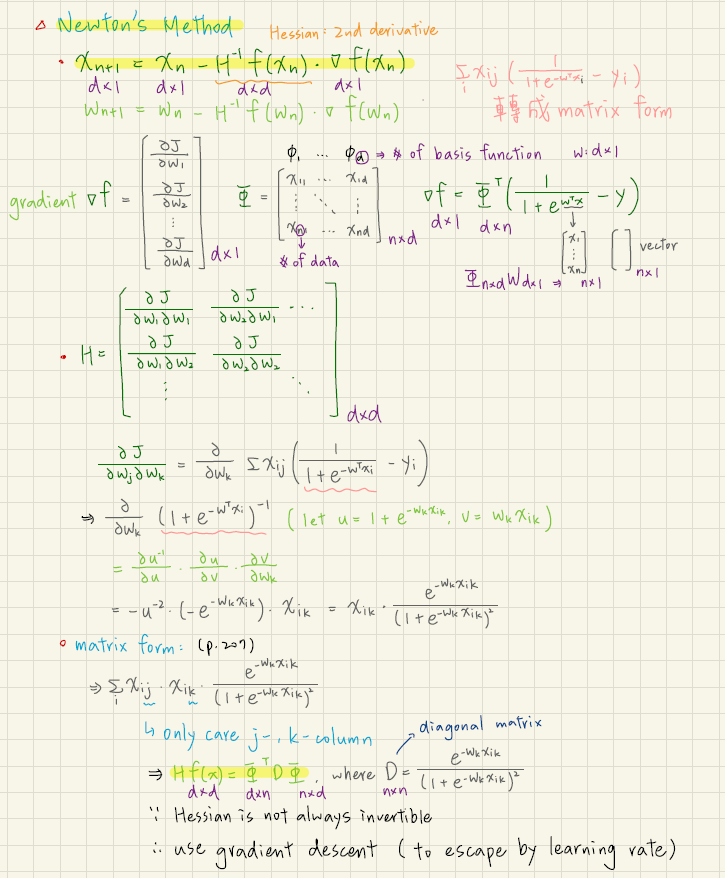

In [ ]:
def Newton(X, labels, learning_rate):
    W = np.random.rand(3, 1) # 初始權重w
    dW = np.ones((3, 1))

    count = 0
    while (np.linalg.norm(dW) > 1e-2): # 小於1e-2就停止(代表gradient很接近0)
        count+=1
        gradient = X.T @ (labels - 1 / (1 + np.exp(-X @ W))) # gradient
        try:
            parameter = (np.exp(-X @ W) / ((1 + np.exp(-X @ W))**2)).reshape(X.shape[0])
            D = np.diag(parameter) #diagonal matrix
            Hessian_inv = np.linalg.inv(X.T @ D @ X)  # 找Hessian matrix，H為一半正定矩陣，並不保證可逆
            dW = Hessian_inv @ gradient
        except np.linalg.LinAlgError:
            dW = gradient # gradient
        W = W + learning_rate * dW #更新

        if count == 10000: #若尚未收斂1e-2，則到10000次就break
            break

    return W

In [ ]:
import numpy as np
import math
from matplotlib import pyplot

def drawPlot(axs, title, N, points, labels):
    axs.set_title(title)

    for i in range(N):
        if labels[i] == 0:
            axs.scatter(points[i][0], points[i][1], color='red', s=10)
        else:
            axs.scatter(points[i][0], points[i][1], color='blue', s=10)
    pyplot.draw()

def printResult(W, labels, predict):
    print("----------------------------------------")
    print("w:")
    for w in W:
        print(f"{w:>15.10f}")

    CM = np.zeros((2, 2), dtype=int)
    for i in range(len(labels)):
        CM[labels[i]][predict[i]] += 1

    print("\nConfusion Matrix:")
    print("{0:>48}".format("Predict cluster 1 Predict cluster 2"))
    print(f"Is cluster 1 {CM[0][0]:^17} {CM[0][1]:^17}")
    print(f"Is cluster 2 {CM[1][0]:^17} {CM[1][1]:^17}\n")
    print(f"Sensitivity (Successfully predict cluster 1): {CM[0][0]/sum(CM[0]):7.5f}")
    print(f"Specificity (Successfully predict cluster 2): {CM[1][1]/sum(CM[1]):7.5f}\n")

def doPredict(W, points):
    predict = []
    for point in points:
        X = np.array([[1, point[0], point[1]]])
        if (1 / (1 + np.exp(-(X @ W)))) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)

    return np.array([predict], dtype=int).T

## N = 50； mx1 = my1 = 1； mx2 = my2 = 10；vx1 = vy1 = vx2 = vy2 = 2

learning rate = 0.2
number of data points = 50
mx1 = 1
mx2 = 10
my1 = 1
my2 = 10
vx1 = 2
vx2 = 2
vy1 = 2
vy2 = 2
----------------------------------------
w:
 -54.0472330530
  15.0935814798
  -4.4532381328

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        50                 0        
Is cluster 2         0                50        

Sensitivity (Successfully predict cluster 1): 1.00000
Specificity (Successfully predict cluster 2): 1.00000

----------------------------------------
w:
-136.9973625244
  18.6481138824
   3.5897686097

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        50                 0        
Is cluster 2         0                50        

Sensitivity (Successfully predict cluster 1): 1.00000
Specificity (Successfully predict cluster 2): 1.00000



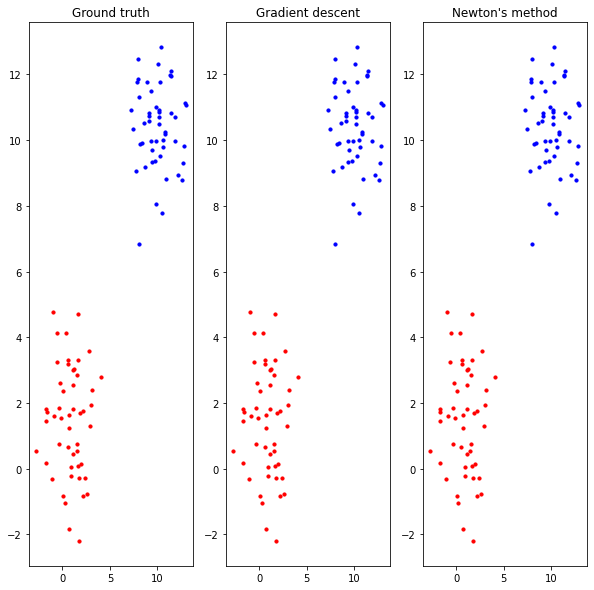

In [ ]:
learning_rate = float(input("learning rate = "))
N = int(input("number of data points = "))
mx = [float(input("mx1 = ")), float(input("mx2 = "))]
my = [float(input("my1 = ")), float(input("my2 = "))]
vx = [float(input("vx1 = ")), float(input("vx2 = "))]
vy = [float(input("vy1 = ")), float(input("vy2 = "))]

# D1 and D2
points = []
for label in range(2):
    for i in range(N):
        point = [Gaussian_data_gen(mx[label], vx[label]), Gaussian_data_gen(my[label], vy[label])]
        points.append(point)

# 製作design_matrix矩陣
X = np.ones((len(points), 3))
X[:, 1:] = np.vstack(points)

# 製作labels矩陣(true)
labels = np.zeros((2*N, 1), dtype=int)
labels[N:] = np.ones((N, 1), dtype=int)

f, axs = pyplot.subplots(1, 3, figsize=(10, 10))
drawPlot(axs[0], "Ground truth", 2*N, points, labels.flatten())

W = Gradient_descent(X, labels, learning_rate)
predict = doPredict(W, points)
printResult(W.flatten(), labels.flatten(), predict.flatten())
drawPlot(axs[1], "Gradient descent", 2*N, points, predict.flatten())

W = Newton(X, labels, learning_rate)
predict = doPredict(W, points)
printResult(W.flatten(), labels.flatten(), predict.flatten())
drawPlot(axs[2], "Newton's method", 2*N, points, predict.flatten())

pyplot.show()

## N = 50； mx1 = my1 = 1； mx2 = my2 = 3；vx1 = vy1 = 2; vx2 = vy2 = 4

learning rate = 0.2
number of data points = 50
mx1 = 1
mx2 = 3
my1 = 1
my2 = 3
vx1 = 2
vx2 = 4
vy1 = 2
vy2 = 4
----------------------------------------
w:
 -43.0393123873
  16.9801998139
  17.7619617993

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        24                26        
Is cluster 2         2                48        

Sensitivity (Successfully predict cluster 1): 0.48000
Specificity (Successfully predict cluster 2): 0.96000

----------------------------------------
w:
  -3.6129526062
   0.7995265402
   0.9210778057

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        42                 8        
Is cluster 2         9                41        

Sensitivity (Successfully predict cluster 1): 0.84000
Specificity (Successfully predict cluster 2): 0.82000



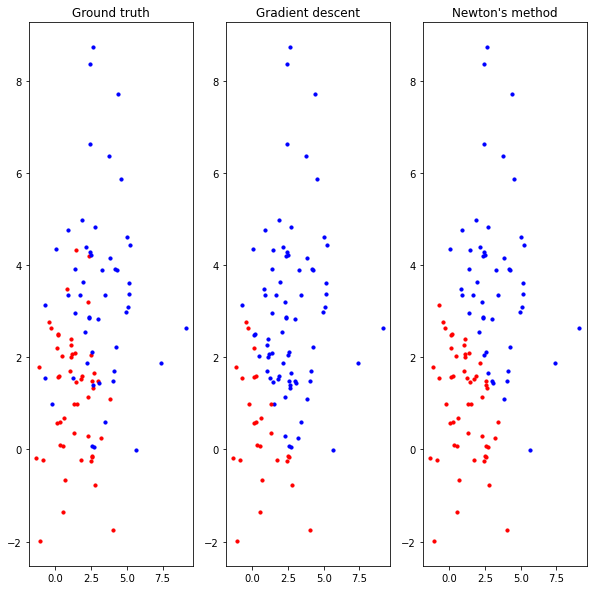

In [ ]:
learning_rate = float(input("learning rate = "))
N = int(input("number of data points = "))
mx = [float(input("mx1 = ")), float(input("mx2 = "))]
my = [float(input("my1 = ")), float(input("my2 = "))]
vx = [float(input("vx1 = ")), float(input("vx2 = "))]
vy = [float(input("vy1 = ")), float(input("vy2 = "))]

# D1 and D2
points = []
for label in range(2):
    for i in range(N):
        point = [Gaussian_data_gen(mx[label], vx[label]), Gaussian_data_gen(my[label], vy[label])]
        points.append(point)

X = np.ones((len(points), 3))
X[:, 1:] = np.vstack(points)
labels = np.zeros((2*N, 1), dtype=int)
labels[N:] = np.ones((N, 1), dtype=int)

f, axs = pyplot.subplots(1, 3, figsize=(10, 10))
drawPlot(axs[0], "Ground truth", 2*N, points, labels.flatten())

W = Gradient_descent(X, labels, learning_rate)
predict = doPredict(W, points)
printResult(W.flatten(), labels.flatten(), predict.flatten())
drawPlot(axs[1], "Gradient descent", 2*N, points, predict.flatten())

W = Newton(X, labels, learning_rate)
predict = doPredict(W, points)
printResult(W.flatten(), labels.flatten(), predict.flatten())
drawPlot(axs[2], "Newton's method", 2*N, points, predict.flatten())

pyplot.show()

# HW4-2 EM
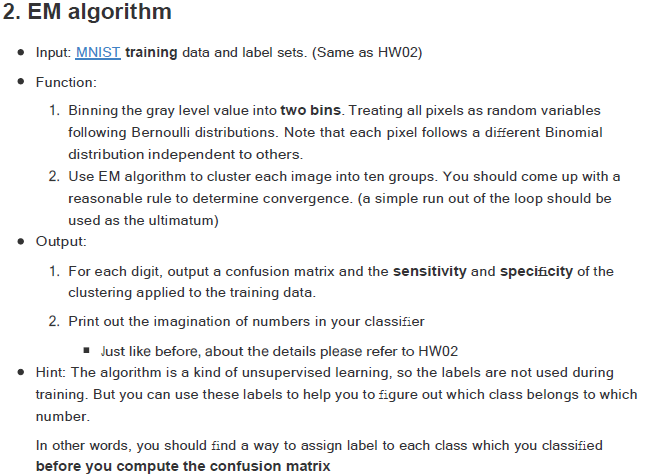

## Graph01

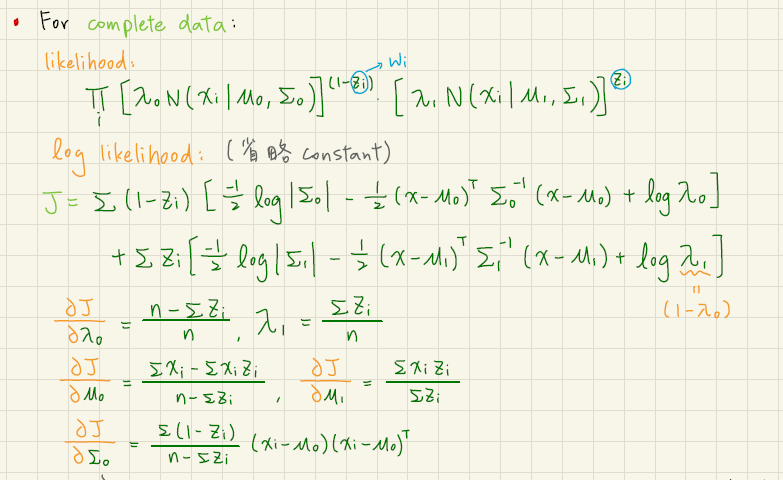

## Graph02 for W and lambda

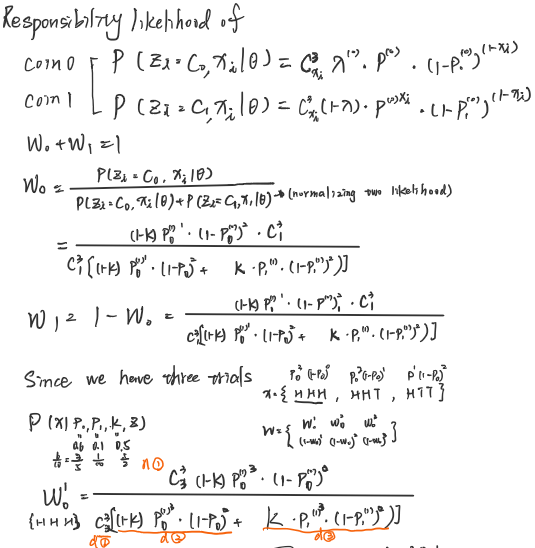

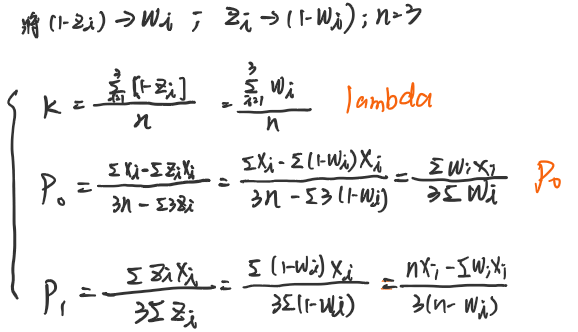

In [ ]:
import numpy as np

def Load():
    import gzip
    train_labels = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW2_1023/train-labels-idx1-ubyte.gz'
    train_images = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW2_1023/train-images-idx3-ubyte.gz'
    label_file = gzip.open(train_labels, "r") #("train-labels.idx1-ubyte", "rb")
    image_file = gzip.open(train_images, "r") #("train-images.idx3-ubyte", "rb")

    label_file.read(8)
    image_file.read(4)
    number = int.from_bytes(image_file.read(4), byteorder='big')
    row = int.from_bytes(image_file.read(4), byteorder='big')
    column = int.from_bytes(image_file.read(4), byteorder='big')

    label = np.zeros(number, dtype=int)
    data = np.zeros((number, row * column), dtype=int)

    for i in range(number):
        label[i] = label_file.read(1)[0]
        for j in range(row):
            for k in range(column):
                data[i][column*j + k] = image_file.read(1)[0]/128

    label_file.close()
    image_file.close()

    return number, label, data.astype(float)

## EM
unsupervise learning

In [ ]:
def EM(N, data):
    C, P = init() # C: chance to choise 0~9, P_(i,pixel): the probability for each pixel in 0~9
    result = ""
    dC = 100
    dP = 100
    count = 0
    while (dC >= 0.01) & (dP >= 0.01): #當值大於0.01時則繼續執行，反之停止
        count += 1
        w = E_step(N, C, P, data)

        C_new, P_new = M_step(N, C, P, w, data)

        dC = np.linalg.norm(C - C_new)
        dP = np.linalg.norm(P - P_new)
        C = C_new #更新
        P = P_new
        for i in range(10):
            result += SetResult(P, i, False)
        result += f"No. of Iteration: {count}, Difference: {dC+dP:<15.10f}\n\n"
        result += "------------------------------------------------------------\n\n"
        if count == 20: #超過20次則停止執行
            break

    return C, P, result, count

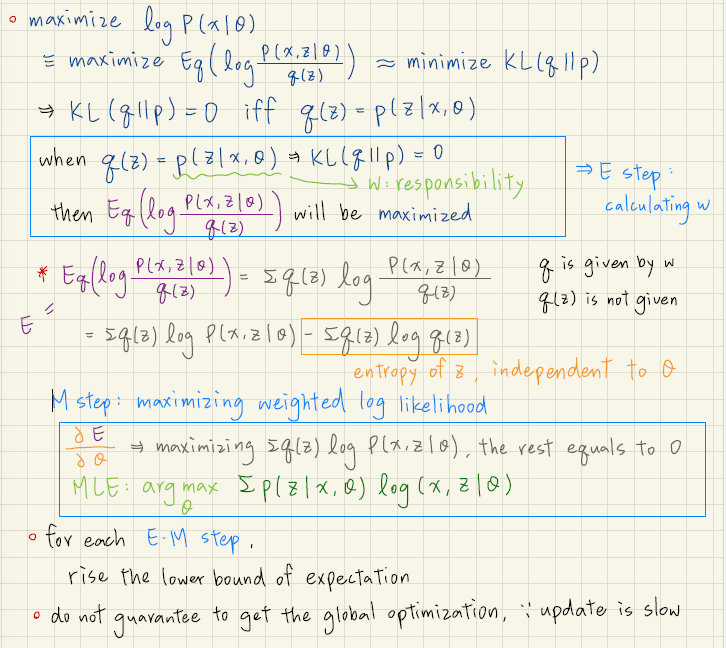

In [ ]:
def init():
    C = np.full((10),0.1) # C: chance to choise 0~9, P_(i,pixel): the probability for each pixel in 0~9
    P = np.random.rand(10, 784)
    return C, P

def E_step(N, C, P, data): # Estep : getting the W:Responsibility. *calculating(weighting between two clusters) the distance from the point to the center
    w = np.zeros((N, 10))
    for n in range(N):
        for i in range(10): #Graph02 with formula # denominator
            w[n][i] = np.log(C[i]) + np.sum(data[n] * np.log(P[i]+1e-10)) + np.sum((1 - data[n]) * np.log(1-P[i]+1e-10))
        w[n] = np.exp(w[n] - max(w[n])) # numerator
        w[n] = w[n] / np.sum(w[n]) # numerator / denominator
    return w

def M_step(N, C, P, w, data): # M step : maximizing parameters by MLE
    C_new = np.zeros(10)
    for i in range(10): # lambda
        C_new[i] = np.sum(w.T[i]) / N
    P_new = w.T @ data
    for i in range(10): # P0
        P_new[i] /= np.sum(w.T[i])

    return C_new, P_new

In [ ]:
def SetResult(P, i, labeled):
    result = ""
    if labeled:
        result += "labeled "
    result += f"class {i}:\n"
    for row in range(28):
        for column in range(28):
            if (P[i][row*28+column] >= 0.5):
                result += "1 "
            else:
                result += "0 "
        result += "\n"
    result += "\n"
    return result

def SetCMResult(confusion_matrix, count, N):
    result = ""
    currect = 0
    for i in range(10):
        currect += confusion_matrix[i][0][0]
        result += f"Confusion Matrix {i}:\n"
        result += f"                Predict number {i} Predict not number {i}\n"
        result += "{0:<15} {1:^16} {2:^20}\n".format(f"Is number {i}", f"{confusion_matrix[i][0][0]}", f"{confusion_matrix[i][0][1]}")
        result += "{0:<15} {1:^16} {2:^20}\n".format(f"Isn't number {i}", f"{confusion_matrix[i][1][0]}", f"{confusion_matrix[i][1][1]}")
        result += "\n"
        result += "Sensitivity (Successfully predict number {0}):     {1}\n".format(f"{i}", f"{confusion_matrix[i][0][0]/sum(confusion_matrix[i][0])}")
        result += "Sensitivity (Successfully predict not number {0}): {1}\n".format(f"{i}", f"{confusion_matrix[i][1][1]/sum(confusion_matrix[i][1])}")
        result += "------------------------------------------------------------\n\n"

    result += f"Total iteration to converge: {count}\n"
    result += f"Total error rate: {1 - currect/N}"
    return result

def map_label (number_image, data, label, lam, P, w):
    predict_label = np.argmax (w, axis=1)
    count_table = np.zeros((10, 10))
    mapping_dict = np.zeros(10).astype(int)
    for i in range(number_image): # Increment the count of unknown class to real class
      count_table[label [i]] [predict_label[i]] += 1
    for i in range(10): # Get the class index of the highest probability
      a, b = np.where(count_table == count_table.max())
      mapping_dict[a[0]] = b[e]
      count_table[a[0], :] = -number_image-10000
      count_table[:, b[0]] = -number_image-10000
    return mapping_dict

def inarray(table, value):
    for i in range(len(table)):
        if (value == table[i]):
            return i
    return -1

def Test(N, C, P, data, label, count):
    w = E_step(N, C, P, data)
    predict = np.zeros(N, dtype=int)
    for i in range(N):
        predict[i] = np.argmax(w[i])
    mappingTable = mappingLabel(predict, label)

    result = ""
    for i in range(10):
        result += SetResult(P, mappingTable[i], True)

    confusion_matrix = np.zeros((10, 2, 2), dtype=int)
    for n in range(N):
        T = inarray(mappingTable, predict[n])
        if (label[n] == T):
            confusion_matrix[label[n]][0][0] += 1
            for i in range(10):
                if (i != label[n]):
                    confusion_matrix[i][1][1] += 1
        if (label[n] != T):
            confusion_matrix[label[n]][0][1] += 1
            for i in range(10):
                if (i != label[n]) & (T == i):
                    confusion_matrix[i][1][0] += 1
                elif (i != label[n]) & (T != i):
                    confusion_matrix[i][1][1] += 1

    result += SetCMResult(confusion_matrix, count, N)
    return result

## Result

In [ ]:
# loading
N, label, data = Load()
print(N)
print(label)
print(data)

Loading...
60000
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# EM algorithm
print("EM...")
C, P, result, count= EM(N, data)
print(C)
print(P)
print(result)
print(count)

EM...
[1.66666667e-05 1.20925261e-01 6.50230852e-02 1.05179576e-01
 1.36739458e-01 9.82664439e-02 8.33821073e-02 1.56006403e-01
 9.95955761e-02 1.34865424e-01]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
class 0:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 

In [ ]:
# Test
print("Testing...")
result += Test(N, C, P, data, label, count)
print(result)

resultFile = open(f"result.txt", 'w')
resultFile.write(result)

Testing...
class 0:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 
0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 1 1 1

214056